In [1]:
# =============================================================================
# Cell 1: Import Libraries
# =============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.metrics import (mean_absolute_error, mean_squared_error, r2_score,
                           accuracy_score, classification_report, confusion_matrix)
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import Ridge, LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

print("Libraries imported successfully!")

Libraries imported successfully!


In [2]:
# =============================================================================
# Cell 2: Load Data and Models
# =============================================================================

# Load feature engineering results
with open('../src/models/train_test_splits.pkl', 'rb') as f:
    splits = pickle.load(f)

# Load optimized model
with open('../src/models/optimized_model.pkl', 'rb') as f:
    best_regression_model = pickle.load(f)

# Load optimization results
with open('../src/models/optimization_results.pkl', 'rb') as f:
    optimization_results = pickle.load(f)

print("Data and models loaded successfully!")
print(f"Best regression model: {optimization_results['best_model_name']}")
print(f"Best regression MAE: {optimization_results['test_mae']:.3f}")

# Prepare data
X_train = splits['combined']['X_train']
X_test = splits['combined']['X_test']
y_train = splits['combined']['y_train']
y_test = splits['combined']['y_test']

print(f"Data shape: {X_train.shape}, {X_test.shape}")

Data and models loaded successfully!
Best regression model: SVR
Best regression MAE: 0.721
Data shape: (10978, 5010), (2745, 5010)


In [3]:
# =============================================================================
# Cell 3: Detailed Regression Model Analysis
# =============================================================================

print("="*60)
print("DETAILED REGRESSION MODEL ANALYSIS")
print("="*60)

# Make predictions
y_pred_reg = best_regression_model.predict(X_test)

# Calculate comprehensive metrics
mae = mean_absolute_error(y_test, y_pred_reg)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_reg))
r2 = r2_score(y_test, y_pred_reg)

print(f"Regression Model Performance:")
print(f"  MAE: {mae:.3f}")
print(f"  RMSE: {rmse:.3f}")
print(f"  R²: {r2:.3f}")

# Prediction distribution analysis
print(f"\nPrediction Analysis:")
print(f"  Predicted min: {y_pred_reg.min():.3f}")
print(f"  Predicted max: {y_pred_reg.max():.3f}")
print(f"  Predicted mean: {y_pred_reg.mean():.3f}")
print(f"  Predicted std: {y_pred_reg.std():.3f}")

print(f"\nActual vs Predicted Stats:")
print(f"  Actual min: {y_test.min():.3f}")
print(f"  Actual max: {y_test.max():.3f}")
print(f"  Actual mean: {y_test.mean():.3f}")
print(f"  Actual std: {y_test.std():.3f}")


DETAILED REGRESSION MODEL ANALYSIS
Regression Model Performance:
  MAE: 0.721
  RMSE: 0.975
  R²: 0.700

Prediction Analysis:
  Predicted min: -0.538
  Predicted max: 6.528
  Predicted mean: 2.526
  Predicted std: 1.503

Actual vs Predicted Stats:
  Actual min: 1.000
  Actual max: 5.000
  Actual mean: 2.544
  Actual std: 1.780



REGRESSION ERROR ANALYSIS
Error Statistics:
  Mean error: 0.018
  Median error: -0.064
  Error std: 0.975
  Mean absolute error: 0.721

Error by Actual Rating:
  Rating 1: 0.607 ± 0.545
  Rating 2: 0.647 ± 0.481
  Rating 3: 0.957 ± 0.613
  Rating 4: 0.872 ± 0.664
  Rating 5: 0.863 ± 0.817


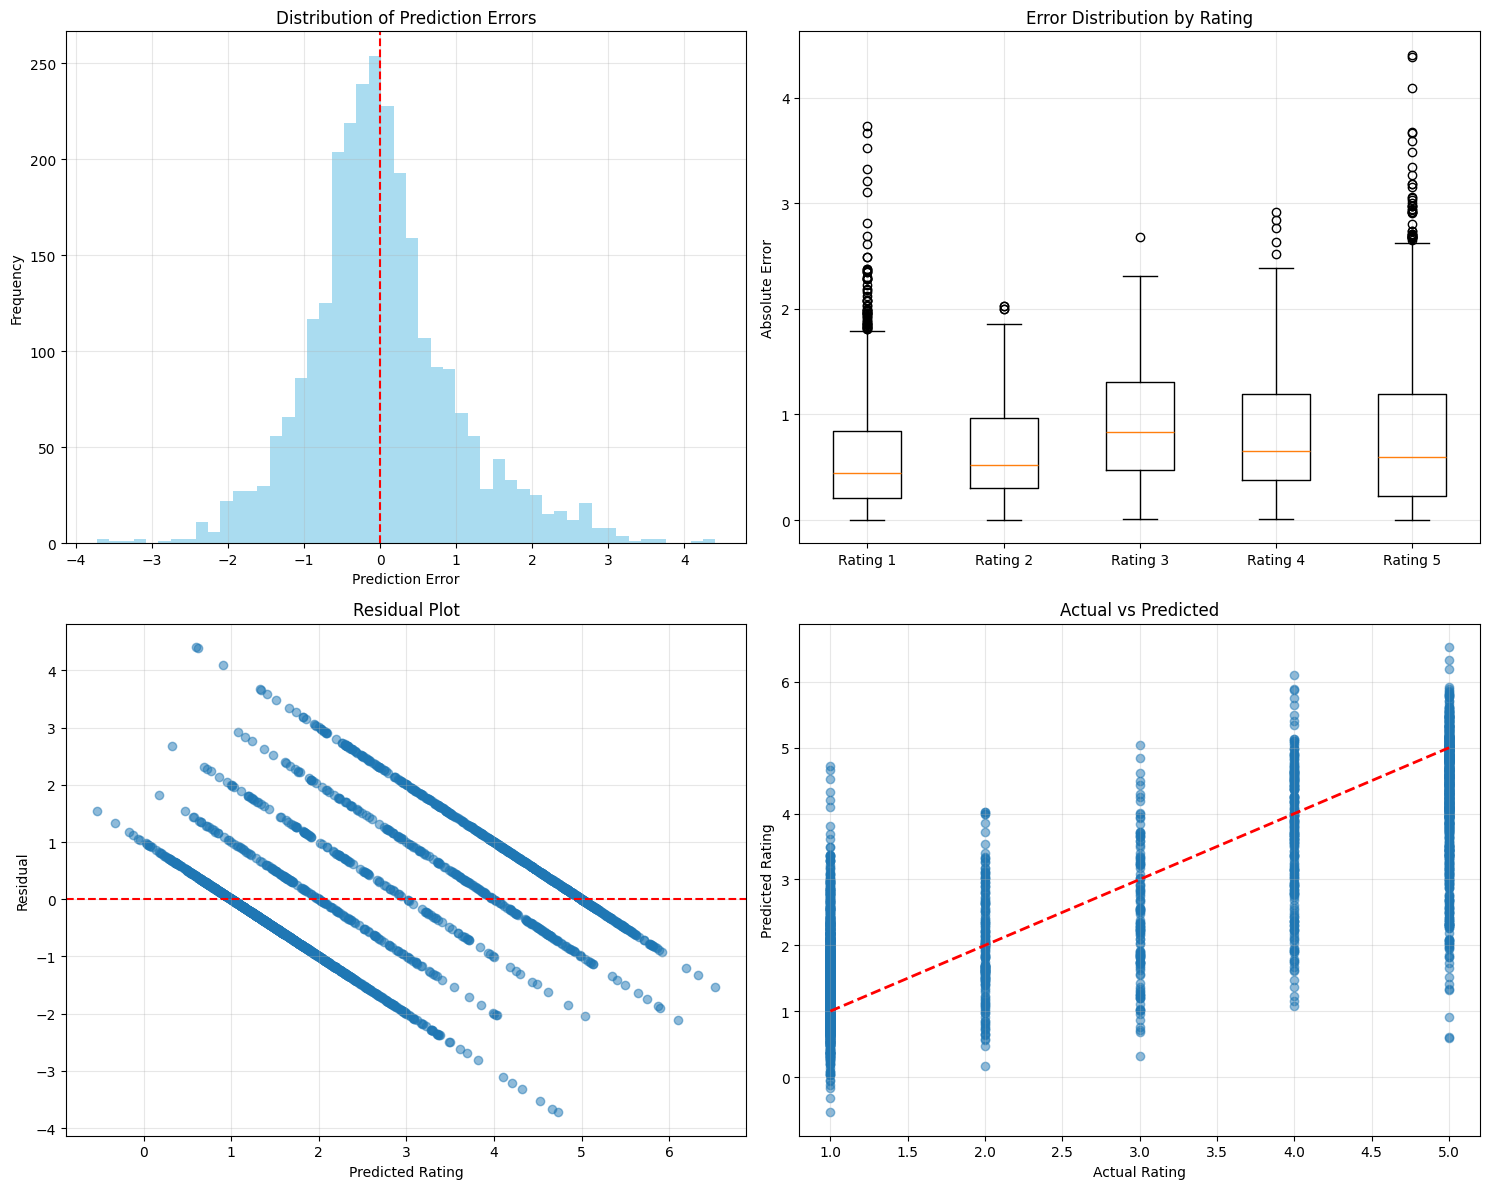

In [4]:
# =============================================================================
# Cell 4: Regression Error Analysis
# =============================================================================

print("\n" + "="*50)
print("REGRESSION ERROR ANALYSIS")
print("="*50)

# Calculate prediction errors
errors = y_test - y_pred_reg
abs_errors = np.abs(errors)

# Error statistics
print(f"Error Statistics:")
print(f"  Mean error: {errors.mean():.3f}")
print(f"  Median error: {np.median(errors):.3f}")
print(f"  Error std: {errors.std():.3f}")
print(f"  Mean absolute error: {abs_errors.mean():.3f}")

# Error distribution by actual rating
print(f"\nError by Actual Rating:")
for rating in sorted(y_test.unique()):
    rating_mask = y_test == rating
    rating_errors = abs_errors[rating_mask]
    print(f"  Rating {int(rating)}: {rating_errors.mean():.3f} ± {rating_errors.std():.3f}")

# Visualize errors
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Error histogram
axes[0, 0].hist(errors, bins=50, alpha=0.7, color='skyblue')
axes[0, 0].set_xlabel('Prediction Error')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Distribution of Prediction Errors')
axes[0, 0].axvline(x=0, color='red', linestyle='--')
axes[0, 0].grid(True, alpha=0.3)

# Absolute error by rating
rating_errors = []
ratings = sorted(y_test.unique())
for rating in ratings:
    rating_mask = y_test == rating
    rating_errors.append(abs_errors[rating_mask])

axes[0, 1].boxplot(rating_errors, labels=[f'Rating {int(r)}' for r in ratings])
axes[0, 1].set_ylabel('Absolute Error')
axes[0, 1].set_title('Error Distribution by Rating')
axes[0, 1].grid(True, alpha=0.3)

# Residual plot
axes[1, 0].scatter(y_pred_reg, errors, alpha=0.5)
axes[1, 0].axhline(y=0, color='red', linestyle='--')
axes[1, 0].set_xlabel('Predicted Rating')
axes[1, 0].set_ylabel('Residual')
axes[1, 0].set_title('Residual Plot')
axes[1, 0].grid(True, alpha=0.3)

# Actual vs Predicted
axes[1, 1].scatter(y_test, y_pred_reg, alpha=0.5)
axes[1, 1].plot([1, 5], [1, 5], 'r--', lw=2)
axes[1, 1].set_xlabel('Actual Rating')
axes[1, 1].set_ylabel('Predicted Rating')
axes[1, 1].set_title('Actual vs Predicted')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [5]:
# =============================================================================
# Cell 5: Classification Model Comparison
# =============================================================================

print("\n" + "="*60)
print("CLASSIFICATION MODEL COMPARISON")
print("="*60)

# Why try classification?
print("Why compare with classification:")
print("1. Ratings are discrete values (1, 2, 3, 4, 5)")
print("2. Customer reviews often have clear sentiment categories")
print("3. Classification might be more interpretable")
print("4. Some applications prefer categorical predictions")

# Convert continuous ratings to integer classes
y_train_class = y_train.round().astype(int)
y_test_class = y_test.round().astype(int)

print(f"\nClass distribution in training set:")
print(pd.Series(y_train_class).value_counts().sort_index())

print(f"\nClass distribution in test set:")
print(pd.Series(y_test_class).value_counts().sort_index())


CLASSIFICATION MODEL COMPARISON
Why compare with classification:
1. Ratings are discrete values (1, 2, 3, 4, 5)
2. Customer reviews often have clear sentiment categories
3. Classification might be more interpretable
4. Some applications prefer categorical predictions

Class distribution in training set:
ReviewRating
1    5736
2     697
3     518
4     891
5    3136
Name: count, dtype: int64

Class distribution in test set:
ReviewRating
1    1434
2     174
3     130
4     223
5     784
Name: count, dtype: int64


In [6]:
# =============================================================================
# Cell 6: Train Classification Models
# =============================================================================

print("\n" + "="*50)
print("TRAINING CLASSIFICATION MODELS")
print("="*50)

# Random Forest Classifier
print("Training Random Forest Classifier...")
rf_classifier = RandomForestClassifier(
    n_estimators=100,
    max_depth=15,
    min_samples_split=5,
    random_state=42
)
rf_classifier.fit(X_train, y_train_class)

# Logistic Regression Classifier
print("Training Logistic Regression Classifier...")
lr_classifier = LogisticRegression(
    max_iter=1000,
    random_state=42
)
lr_classifier.fit(X_train, y_train_class)

print("Classification models trained successfully!")


TRAINING CLASSIFICATION MODELS
Training Random Forest Classifier...
Training Logistic Regression Classifier...
Classification models trained successfully!


In [7]:
# =============================================================================
# Cell 7: Classification Model Evaluation
# =============================================================================

print("\n" + "="*50)
print("CLASSIFICATION MODEL EVALUATION")
print("="*50)

# Random Forest Classification Results
y_pred_rf_class = rf_classifier.predict(X_test)
rf_accuracy = accuracy_score(y_test_class, y_pred_rf_class)
rf_mae_class = mean_absolute_error(y_test_class, y_pred_rf_class)

print(f"Random Forest Classifier:")
print(f"  Accuracy: {rf_accuracy:.3f}")
print(f"  MAE: {rf_mae_class:.3f}")

# Logistic Regression Classification Results
y_pred_lr_class = lr_classifier.predict(X_test)
lr_accuracy = accuracy_score(y_test_class, y_pred_lr_class)
lr_mae_class = mean_absolute_error(y_test_class, y_pred_lr_class)

print(f"\nLogistic Regression Classifier:")
print(f"  Accuracy: {lr_accuracy:.3f}")
print(f"  MAE: {lr_mae_class:.3f}")

# Compare with regression model (rounded predictions)
y_pred_reg_rounded = y_pred_reg.round().astype(int)
reg_accuracy = accuracy_score(y_test_class, y_pred_reg_rounded)
reg_mae_rounded = mean_absolute_error(y_test_class, y_pred_reg_rounded)

print(f"\nRegression Model (rounded predictions):")
print(f"  Accuracy: {reg_accuracy:.3f}")
print(f"  MAE: {reg_mae_rounded:.3f}")


CLASSIFICATION MODEL EVALUATION
Random Forest Classifier:
  Accuracy: 0.712
  MAE: 0.710

Logistic Regression Classifier:
  Accuracy: 0.770
  MAE: 0.456

Regression Model (rounded predictions):
  Accuracy: 0.483
  MAE: 0.671



DETAILED CLASSIFICATION ANALYSIS
Best classifier: Logistic Regression
Best accuracy: 0.770

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           1       0.80      0.97      0.87      1434
           2       0.27      0.02      0.03       174
           3       0.50      0.02      0.03       130
           4       0.40      0.10      0.16       223
           5       0.75      0.89      0.81       784

    accuracy                           0.77      2745
   macro avg       0.54      0.40      0.38      2745
weighted avg       0.70      0.77      0.71      2745



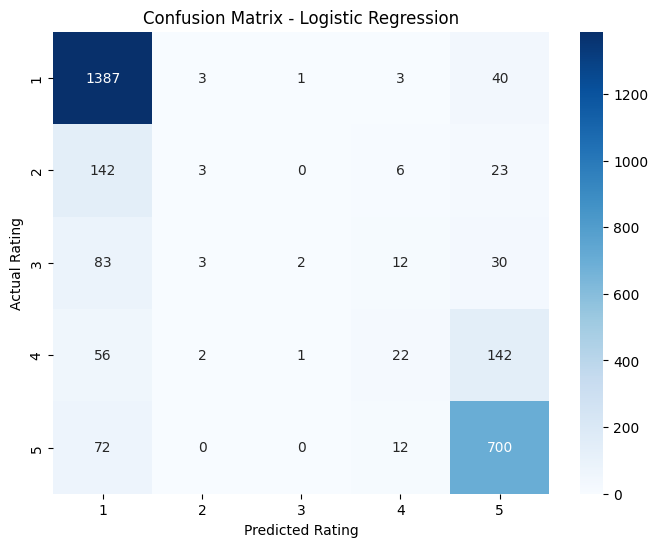

In [8]:
# =============================================================================
# Cell 8: Detailed Classification Analysis
# =============================================================================

print("\n" + "="*50)
print("DETAILED CLASSIFICATION ANALYSIS")
print("="*50)

# Choose best classification model
if rf_accuracy > lr_accuracy:
    best_classifier = rf_classifier
    best_class_pred = y_pred_rf_class
    best_class_name = "Random Forest"
    best_class_accuracy = rf_accuracy
else:
    best_classifier = lr_classifier
    best_class_pred = y_pred_lr_class
    best_class_name = "Logistic Regression"
    best_class_accuracy = lr_accuracy

print(f"Best classifier: {best_class_name}")
print(f"Best accuracy: {best_class_accuracy:.3f}")

# Classification report
print(f"\nClassification Report for {best_class_name}:")
print(classification_report(y_test_class, best_class_pred))

# Confusion Matrix
cm = confusion_matrix(y_test_class, best_class_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=[1, 2, 3, 4, 5], 
            yticklabels=[1, 2, 3, 4, 5])
plt.xlabel('Predicted Rating')
plt.ylabel('Actual Rating')
plt.title(f'Confusion Matrix - {best_class_name}')
plt.show()


FINAL MODEL COMPARISON AND DECISION
Model Comparison Summary:
                             Model      MAE  Accuracy        R²      RMSE
          Random Forest Regression 0.720774  0.482696  0.700099  0.974875
      Random Forest Classification 0.710018  0.711840       N/A       N/A
Logistic Regression Classification 0.456466  0.770128       N/A       N/A


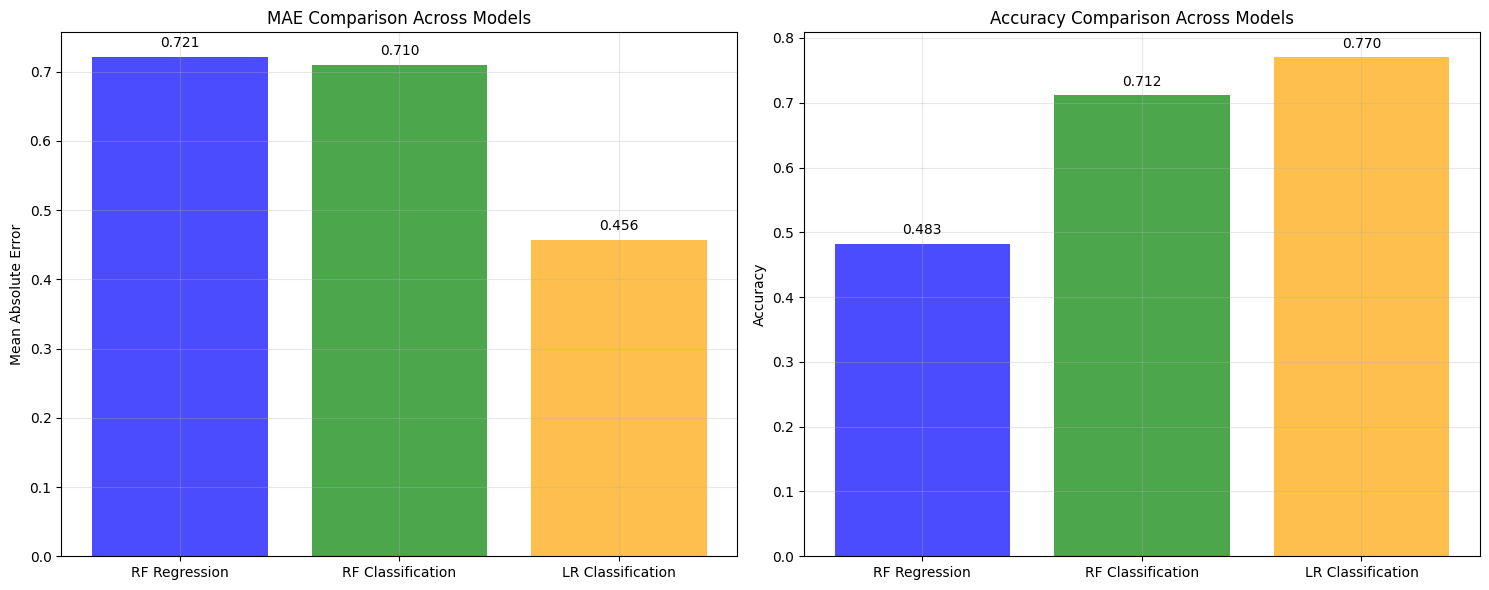

In [9]:
# =============================================================================
# Cell 9: Final Model Comparison and Decision
# =============================================================================

print("\n" + "="*60)
print("FINAL MODEL COMPARISON AND DECISION")
print("="*60)

# Create comparison summary
comparison_data = {
    'Model': ['Random Forest Regression', 'Random Forest Classification', 
              'Logistic Regression Classification'],
    'MAE': [mae, rf_mae_class, lr_mae_class],
    'Accuracy': [reg_accuracy, rf_accuracy, lr_accuracy],
    'R²': [r2, 'N/A', 'N/A'],
    'RMSE': [rmse, 'N/A', 'N/A']
}

comparison_df = pd.DataFrame(comparison_data)
print("Model Comparison Summary:")
print(comparison_df.to_string(index=False))

# Visualize comparison
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# MAE comparison
models = ['RF Regression', 'RF Classification', 'LR Classification']
mae_values = [mae, rf_mae_class, lr_mae_class]
colors = ['blue', 'green', 'orange']

bars1 = axes[0].bar(models, mae_values, color=colors, alpha=0.7)
axes[0].set_ylabel('Mean Absolute Error')
axes[0].set_title('MAE Comparison Across Models')
axes[0].grid(True, alpha=0.3)

# Add value labels on bars
for bar, value in zip(bars1, mae_values):
    axes[0].text(bar.get_x() + bar.get_width()/2., bar.get_height() + 0.01,
                f'{value:.3f}', ha='center', va='bottom')

# Accuracy comparison
accuracy_values = [reg_accuracy, rf_accuracy, lr_accuracy]
bars2 = axes[1].bar(models, accuracy_values, color=colors, alpha=0.7)
axes[1].set_ylabel('Accuracy')
axes[1].set_title('Accuracy Comparison Across Models')
axes[1].grid(True, alpha=0.3)

# Add value labels on bars
for bar, value in zip(bars2, accuracy_values):
    axes[1].text(bar.get_x() + bar.get_width()/2., bar.get_height() + 0.01,
                f'{value:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [11]:
# =============================================================================
# Cell 10: Model Decision and Recommendation
# =============================================================================

print("\n" + "="*60)
print("MODEL DECISION AND RECOMMENDATION")
print("="*60)

# Decision criteria
print("Decision Criteria:")
print("1. Lower MAE is better (closer predictions to actual ratings)")
print("2. Higher accuracy is better (more exact predictions)")
print("3. Business interpretability")
print("4. Prediction consistency")

# Make recommendation
if mae < min(rf_mae_class, lr_mae_class):
    recommended_model = "Random Forest Regression"
    recommended_mae = mae
    recommended_accuracy = reg_accuracy
    
    print(f"\nRECOMMENDED MODEL: {recommended_model}")
    print(f"Reasons:")
    print(f"1. Best MAE: {recommended_mae:.3f}")
    print(f"2. Good accuracy: {recommended_accuracy:.3f}")
    print(f"3. Can predict continuous values (e.g., 3.7 stars)")
    print(f"4. Better for nuanced rating predictions")
    
    final_model = best_regression_model
    final_predictions = y_pred_reg
    
else:
    recommended_model = best_class_name + " Classification"
    recommended_mae = rf_mae_class if best_class_name == "Random Forest" else lr_mae_class
    recommended_accuracy = best_class_accuracy
    
    print(f"\nRECOMMENDED MODEL: {recommended_model}")
    print(f"Reasons:")
    print(f"1. Good MAE: {recommended_mae:.3f}")
    print(f"2. Best accuracy: {recommended_accuracy:.3f}")
    print(f"3. Clear discrete predictions (1, 2, 3, 4, 5)")
    print(f"4. Easier business interpretation")
    
    final_model = best_classifier
    final_predictions = best_class_pred



MODEL DECISION AND RECOMMENDATION
Decision Criteria:
1. Lower MAE is better (closer predictions to actual ratings)
2. Higher accuracy is better (more exact predictions)
3. Business interpretability
4. Prediction consistency

RECOMMENDED MODEL: Logistic Regression Classification
Reasons:
1. Good MAE: 0.456
2. Best accuracy: 0.770
3. Clear discrete predictions (1, 2, 3, 4, 5)
4. Easier business interpretation


In [13]:
# =============================================================================
# Cell 11: Save Final Model and Results
# =============================================================================

print("\n" + "="*50)
print("SAVING FINAL MODEL AND RESULTS")
print("="*50)

# Save final model
with open('../src/models/final_evaluation_model.pkl', 'wb') as f:
    pickle.dump(final_model, f)

# Save evaluation results
evaluation_results = {
    'recommended_model': recommended_model,
    'regression_mae': mae,
    'regression_accuracy': reg_accuracy,
    'regression_r2': r2,
    'regression_rmse': rmse,
    'rf_classification_mae': rf_mae_class,
    'rf_classification_accuracy': rf_accuracy,
    'lr_classification_mae': lr_mae_class,
    'lr_classification_accuracy': lr_accuracy,
    'final_model_mae': recommended_mae,
    'final_model_accuracy': recommended_accuracy,
    'comparison_df': comparison_df,
    'final_predictions': final_predictions,
    'actual_values': y_test
}

with open('../src/models/evaluation_results.pkl', 'wb') as f:
    pickle.dump(evaluation_results, f)

print("Final model and results saved successfully!")
print(f"Final model saved as: src/models/final_evaluation_model.pkl")
print(f"Evaluation results saved as: src/models/evaluation_results.pkl")


SAVING FINAL MODEL AND RESULTS
Final model and results saved successfully!
Final model saved as: src/models/final_evaluation_model.pkl
Evaluation results saved as: src/models/evaluation_results.pkl
